<a href="https://colab.research.google.com/github/arivle/K-meansWithPython/blob/master/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

input data and shape
(3000, 2)
initial centroids
[[47. 36.]
 [62. 23.]
 [13. 48.]
 [73. 34.]
 [28. 21.]
 [63. 36.]
 [ 3. 22.]
 [27. 23.]
 [ 6. 67.]
 [74. 81.]
 [59. 34.]
 [72. 38.]
 [25.  8.]
 [19. 57.]
 [19.  6.]
 [22. 80.]
 [23. 45.]
 [ 9. 19.]
 [15. 11.]
 [80.  6.]
 [81. 37.]
 [22.  1.]
 [77. 27.]
 [47. 50.]
 [62. 39.]
 [42. 12.]
 [12. 67.]]


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


KeyboardInterrupt: ignored

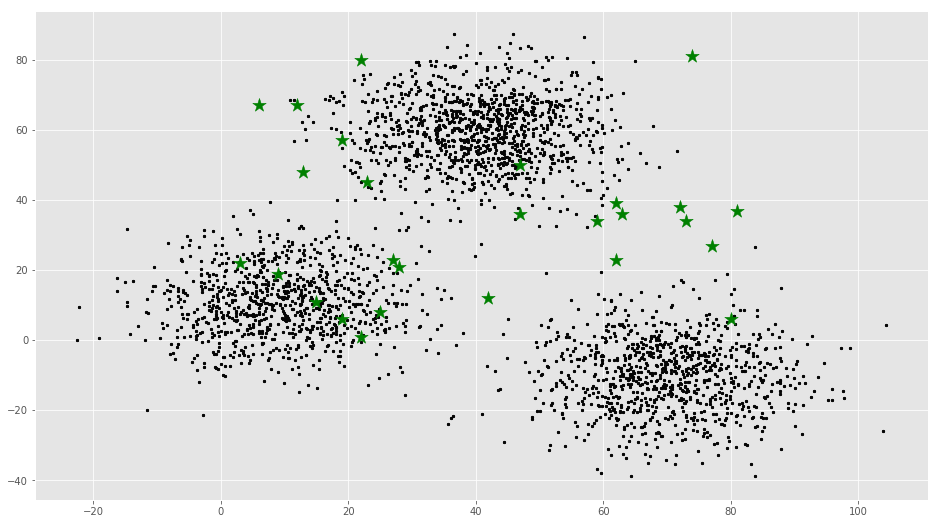

In [25]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

#importing data set
data=pd.read_csv('https://raw.githubusercontent.com/arivle/K-meansWithPython/master/xclara/xclara.csv')
print("input data and shape")
print(data.shape)
data.head()

#Getting the values and plotting it 
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1,f2,c='black', s=7)

#Euclidean Distance Calculator
def dist(a, b, ax=1):
  return np.linalg.norm(a-b, axis=ax)

#number of clusters
k=27

#X coordinates of random centroids
C_x= np.random.randint(0,np.max(X)-20, size=k)

#Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C= np.array(list(zip(C_x, C_y)), dtype=np.float32)
print("initial centroids")
print(C)

#plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

#to store the value of centroids when it updates
C_old = np.zeros(C.shape)

#Cluster Lables(0,1,2)
clusters = np.zeros(len(X))

#Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)

#Loop will run till the error between new centroids and old centroids
while error !=0:
  #assigning each value to its closest cluster
  for i in range(len(X)):
    distances = dist(X[i], C)
    cluster = np.argmin(distances)
    clusters[i] = cluster
  
  #storing the old centroid values
  C_old= deepcopy(C)
  
  #finding the new centroids by taking the average value
  for i in range(k):
    points = [X[j] for j in range(len(X)) if clusters[j] == i]
    C[i] = np.mean(points, axis=0)
  error = dist(C,C_old, None)

colors = ['r','g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
  points = np.array([X[j] for j in range(len(X)) if clusters[j] ==i])
  ax.scatter(points[:, 0], points[:,1], s=7, c=colors[i])
  
ax.scatter(C[:,0], C[:,1], marker='*', s=200, c='#050505')

input data and shape
(3000, 2)
[[  6.29899561  10.37145191]
 [ 64.00225103 -11.1756371 ]
 [ 44.70991309  65.90302552]
 [ 40.67904794  46.12664143]
 [ 65.31337396 -24.82118052]
 [ 14.25438151  -0.75312941]
 [ 79.734465     5.97227092]
 [ 87.52683697  -9.87118712]
 [ 56.02555217  49.02451072]
 [ 24.32462925  67.40344204]
 [ 22.46289677  24.81766154]
 [ -0.16444241  -1.4551634 ]
 [ 80.42920685 -24.22132055]
 [ 53.95441294  -3.45654555]
 [  5.90748668  24.33237435]
 [ 55.05046248  66.04031938]
 [ 16.1985725   12.85218728]
 [ 73.07015759  -4.5490788 ]
 [ 35.30412048  62.30482348]
 [ 52.58281712 -18.51006661]
 [ -5.59509391  12.58599256]
 [ 64.377702     3.85605061]
 [ 27.09393753   5.00220245]
 [ 26.89615043  51.96045991]
 [ 40.46201688  77.47017413]
 [ 43.95955164  55.57863399]
 [ 73.99207336 -14.9406303 ]]


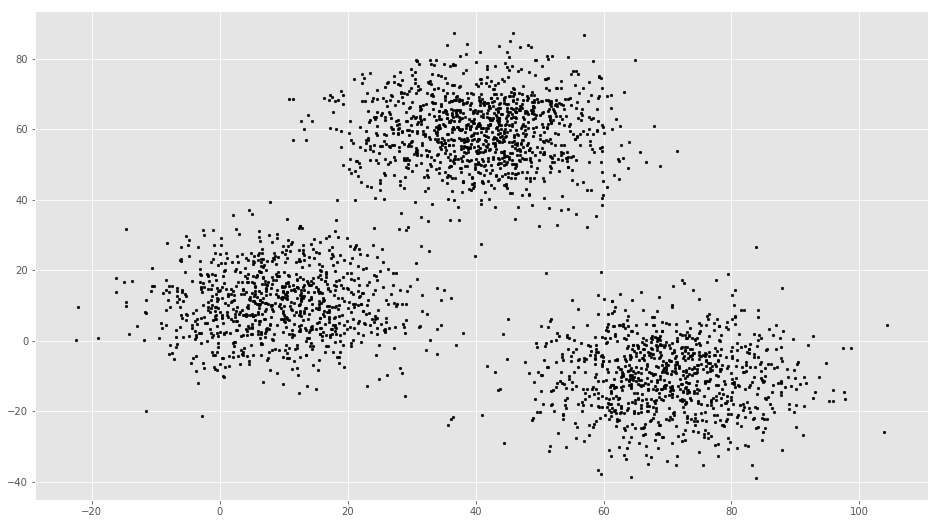

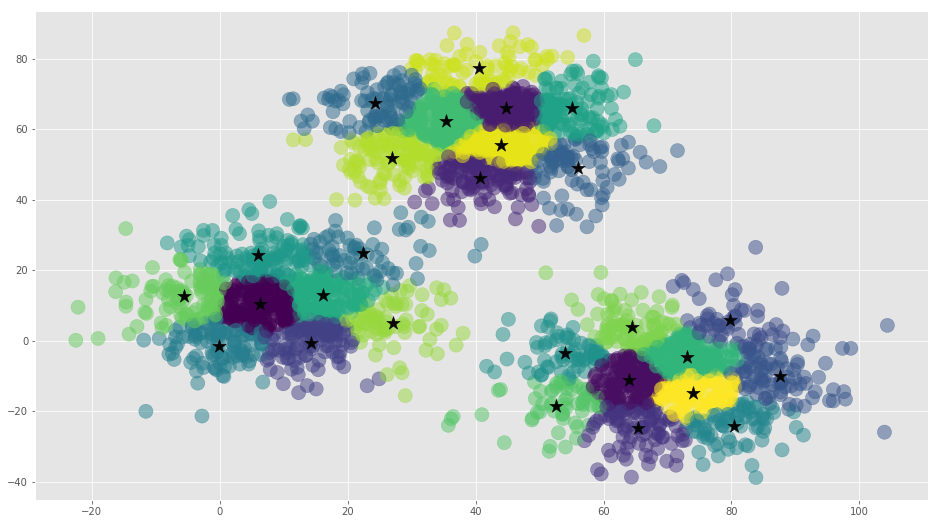

In [30]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

#importing data set
data=pd.read_csv('https://raw.githubusercontent.com/arivle/K-meansWithPython/master/xclara/xclara.csv')
print("input data and shape")
print(data.shape)
data.head()

#Getting the values and plotting it 
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1,f2,c='black', s=7)

k=27
kmeans = KMeans(n_clusters=k).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

colors = ['r','g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:,1], c= kmeans.labels_.astype('float64'), s=200, alpha=0.5)
ax.scatter(centroids[:, 0], centroids[:, 1],marker='*', c='#050505', s=200)

